# Goals
Reproduce the list of most responsive neurons on FWD preset.

See Interactome 2019 paper > Posterior Touch Response Stimulation Scenario

## Timeseries per interesting neuron

In [1]:
from util.neuron_metadata import *
from util.plot_util import *
import numpy as np
import pandas as pd
neuron_metadata_collection = NeuronMetadataCollection.load_from_chem_json('data/chem.json')
fwd_dynamics = np.load('data/dynamics_fwd_5s.npy')

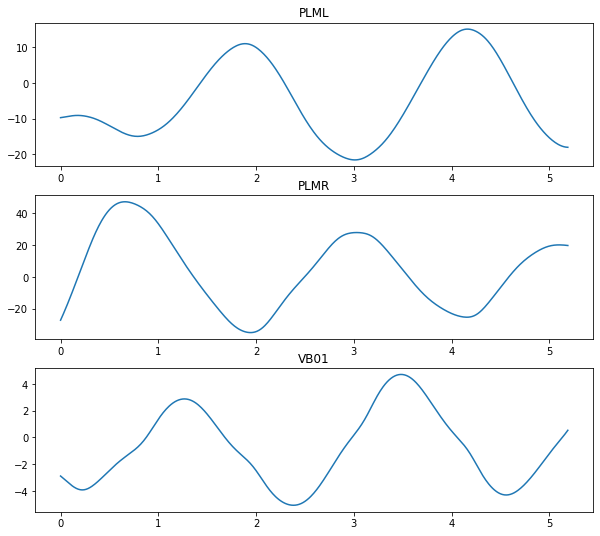

In [15]:
plot_saved_dynamics(['PLML', 'PLMR', 'VB01'], fwd_dynamics, neuron_metadata_collection)

Great! We reproduced these statements
 * There are oscillations
 * The period is ~2s.

## Most responsive neurons

In [2]:
def get_amplitude(timeseries):
    return timeseries.max() - timeseries.min()

In [3]:
amplitude_results = []
for id in range(neuron_metadata_collection.get_size()):
    amplitude = get_amplitude(fwd_dynamics[:,id])
    meta = neuron_metadata_collection.get_metadata(id)
    amplitude_results.append(
        (meta.name, NeuronMetadataCollection.neuron_type_to_str(meta.neuron_type), amplitude))

### Motor neurons analysis

In [33]:
df = pd.DataFrame(amplitude_results, columns =['name', 'type', 'amplitude'])
df[df['type'] == 'MOTOR'].nlargest(50, ['amplitude'])

,name,type,amplitude
193,VB06,MOTOR,69.341682
186,VB05,MOTOR,68.656858
179,VB04,MOTOR,68.188110
172,DB03,MOTOR,59.993748
188,DB04,MOTOR,58.946011
202,VB07,MOTOR,57.153302
36,RID,MOTOR,55.073929
170,VB03,MOTOR,52.053521
152,DB02,MOTOR,50.813307
212,VB08,MOTOR,43.697417


Statement to reproduce:

"In motor neurons, most active neurons (by maximum voltage amplitude above the threshold) appear to be Ventricular and Dorsal type B (VB, DB) neurons alongside with Ventricular and Dorsal type D (VD, DD) and AS motorneurons (AS01 – AS10). These neurons have identical oscillatory period of ∼2 s, however, their dynamics are out of phase to each other."

Hrm, somewhat reproduced. I see all these, but they're not exactly the top ones. Even after I expand to top 50, only 7 out of the 10 AS's get shown. The oscillatory period and out of phase dynamics statement is reproduced successfully.

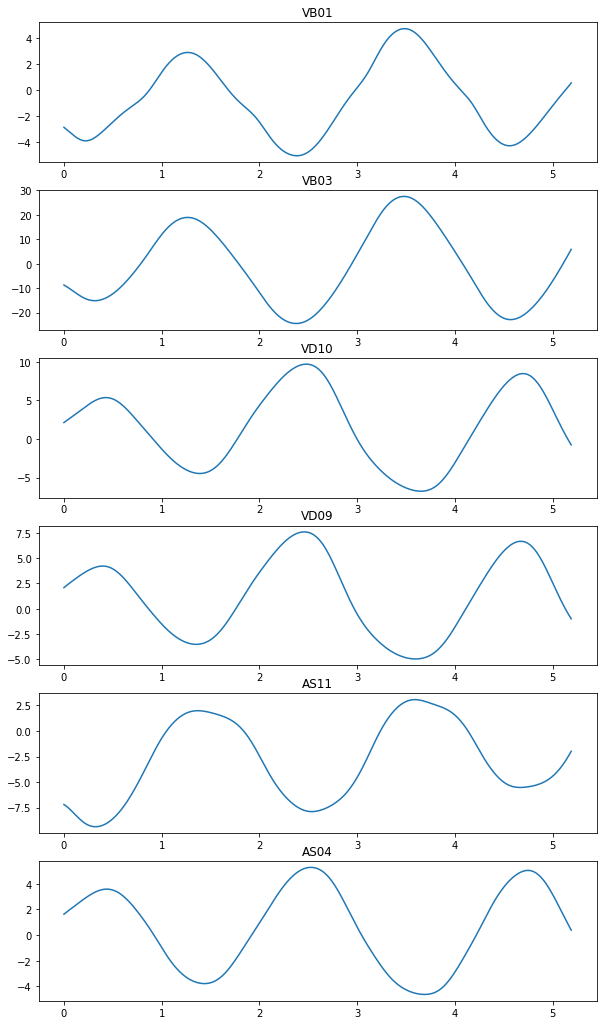

In [34]:
plot_saved_dynamics(['VB01', 'VB03', 'VD10', 'VD09', 'AS11', 'AS04'], fwd_dynamics, neuron_metadata_collection)

### Interneurons

In [41]:
df[df['type'] == 'INTERNEURON'].nlargest(15, ['amplitude'])

,name,type,amplitude
260,LUAL,INTERNEURON,85.721750
269,PVR,INTERNEURON,82.933706
265,LUAR,INTERNEURON,59.763465
253,DVA,INTERNEURON,51.548753
44,ALA,INTERNEURON,41.923160
96,AVBL,INTERNEURON,35.914944
105,AVBR,INTERNEURON,35.826686
277,PVNL,INTERNEURON,26.410912
83,SIBVL,INTERNEURON,21.369539
223,SDQL,INTERNEURON,19.840575


Statement to reproduce:

"Most responsive interneurons turn out to be AVB, LUA, DVA, PVR, and PVC."

Yeah, I think we see the whole cast here.

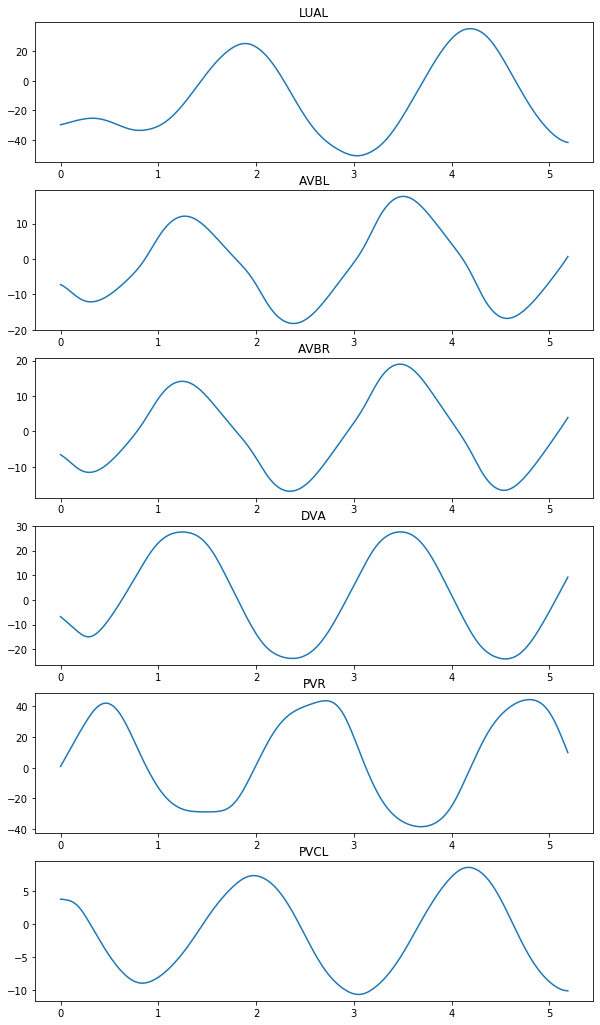

In [42]:
plot_saved_dynamics(['LUAL', 'AVBL', 'AVBR', 'DVA', 'PVR', 'PVCL'], fwd_dynamics, neuron_metadata_collection)